<a href="https://colab.research.google.com/github/Pritam-Mondal18/task-4/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification with Logistic Regression.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve


# Choose a binary classification dataset.


In [24]:

df = pd.read_csv("data.csv")

In [25]:

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [26]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [27]:

X = df.drop(["diagnosis", "id", "Unnamed: 32"], axis=1)
y = df["diagnosis"]

# Train/test split and standardize features.


In [28]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Fit a Logistic Regression model.

In [29]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

# Evaluate with confusion matrix, precision, recall, ROC-AUC.

In [30]:
# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]


In [31]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[70  1]
 [ 2 41]]


In [32]:
# Precision
precision = precision_score(y_test, y_pred, pos_label='M')
print("Precision (Malignant):", precision)

Precision (Malignant): 0.9761904761904762


In [33]:
# Recall
recall = recall_score(y_test, y_pred, pos_label='M')
print("Recall (Malignant):", recall)

Recall (Malignant): 0.9534883720930233


In [34]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.99737962659679


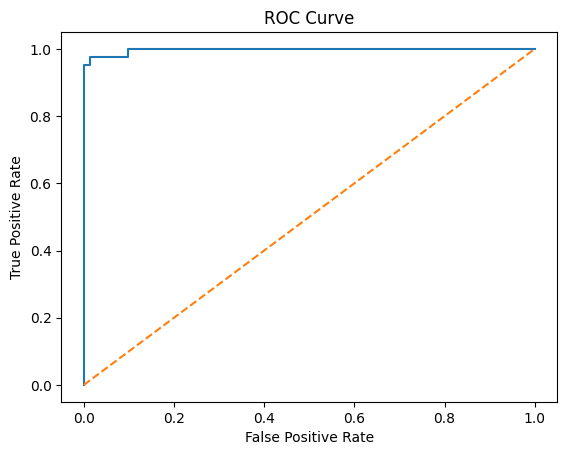

In [35]:
# ROC Curve Plot
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='M')

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# Tune threshold and explain sigmoid function.


In [36]:
threshold = 0.3
y_pred_new = np.where(y_prob >= threshold, 'M', 'B')

print("New Confusion Matrix:\n", confusion_matrix(y_test, y_pred_new))
print("New Precision:", precision_score(y_test, y_pred_new, pos_label='M'))
print("New Recall:", recall_score(y_test, y_pred_new, pos_label='M'))

New Confusion Matrix:
 [[67  4]
 [ 1 42]]
New Precision: 0.9130434782608695
New Recall: 0.9767441860465116


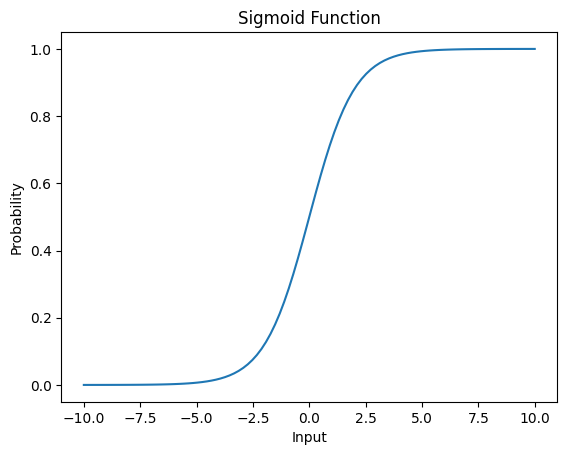

In [37]:
# Sigmoid Function Visualization
x = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-x))

plt.plot(x, sigmoid)
plt.title("Sigmoid Function")
plt.xlabel("Input")
plt.ylabel("Probability")
plt.show()
